[View in Colaboratory](https://colab.research.google.com/github/mxchauhan/Thinkful-Bootcamp-Drills/blob/master/Unit_2_Crime.ipynb)

In [0]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
dataPath = ("https://raw.githubusercontent.com/mxchauhan/Thinkful-Bootcamp-Drills/master/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv")

crimeRaw = pd.read_csv(dataPath, header=None)

In [3]:
#we drop garbage rows
crime = crimeRaw.iloc[5:,:].reset_index(drop=True)

crime.columns = ['city', 'population', 'violent', 'murder', 'rape1', 'rape2', 'robbery',
                'aggAssult', 'propertyCrime', 'burglary', 'larceny', 'motor', 'arson', 'unnamed']

crime.drop('unnamed', axis=1, inplace=True)
crime.drop('rape1', axis=1, inplace=True)

columns = crime.columns
crime[columns] = crime[columns].replace({",": ''}, regex=True)
crime.head()

,city,population,violent,murder,rape2,robbery,aggAssult,propertyCrime,burglary,larceny,motor,arson
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,NaN


In [0]:
from numpy import nan

* https://stackoverflow.com/questions/21608228/conditional-replace-pandas

+ `df.loc[mask, column_name] = 0
`

In [5]:
crime.murder.unique()

array(['0', '8', '1', '3', '47', '10', '2', '5', '335', '7', '42', '4',
       '21', '6', nan], dtype=object)

In [6]:
print(crime.murder.unique())
crime.murder.isnull().sum()


['0' '8' '1' '3' '47' '10' '2' '5' '335' '7' '42' '4' '21' '6' nan]


3

In [9]:
crime.robbery.unique()


array(['0', '227', '4', '3', '31', '12', '22', '1', '13', '101', '10',
       '5', '1322', '9', '2', '48', '17', '11', '8', '29', '7', '76',
       '19', '6', '60', '16', '204', '51', '39', '20', '25', '24', '47',
       '228', '150', '15', '81', '19170', '166', '21', '100', '26', '918',
       '23', '203', '34', '400', '145', '102', '28', '390', nan],
      dtype=object)

In [0]:
crime.loc[crime.propertyCrime == nan, 'propertyCrime'] = '0'
crime.loc[crime.murder == nan, 'murder'] = '0'
crime.loc[crime.robbery == nan, 'robbery'] = '0'
crime.loc[crime.larceny == nan, 'larceny'] = '0'
crime.loc[crime.burglary == nan, 'burglary'] = '0'
crime.loc[crime.motor == nan, 'motor'] = '0'
crime.loc[crime.arson == nan, 'arson'] = '0'

In [0]:
crime.murder = crime.murder.dropna().astype(int)
crime.robbery = crime.murder.dropna().astype(int)
crime.larceny = crime.larceny.dropna().astype(int)
crime.burglary = crime.burglary.dropna().astype(int)
crime.motor = crime.motor.dropna().astype(int)
crime.arson = crime.arson.dropna().astype(int)

In [0]:
np.sort(crime.murder.unique())[::-1] 

type(np.sort(crime.murder.unique())[::-1][7]) 


#maybe we add this back as a column
cleanedMurders = np.asarray([x for x in crime.murder if str(x) != 'nan'])


In [0]:
crime['population2'] = np.asarray([x**2 for x in crime.population])

In [13]:
crime.propertyCrime = crime.propertyCrime.dropna().astype(int)

crime.propertyCrime.describe()

count       348.000000
mean        792.606322
std        7659.724746
min           0.000000
25%          40.500000
50%         112.500000
75%         341.000000
max      141971.000000
Name: propertyCrime, dtype: float64

In [0]:
crime['robbery'] = pd.to_numeric(crime.robbery, errors='coerce')
crime['murder'] = pd.to_numeric(crime.murder, errors = 'coerce')
crime['population'] = pd.to_numeric(crime.population, errors = 'coerce')

features = pd.DataFrame()

#creating features
features['murder'] = np.where(crime.murder >= 1, 1, 0)

features['robbery'] = np.where(crime.robbery >= 1, 1, 0)

features['burglary'] = np.where(crime.burglary >= 1, 1, 0)

features['larceny'] = np.where(crime.larceny >= 1, 1, 0)

features['motor'] = np.where(crime.motor >= 1, 1, 0)

features['arson'] = np.where(crime.arson >= 1, 1, 0)

**Tip:** to get a better result in linear regression, we need to do feature scaling.  (Watch Andrew Ng's videos on this)

In [15]:
features.head()

,murder,robbery,burglary,larceny,motor,arson
0,0,0,1,1,0,0
1,0,0,1,1,1,0
2,0,0,1,1,0,0
3,1,1,1,1,1,0
4,0,0,1,1,1,0


In [0]:
def reject_outliers(data):
    u = np.mean(data)
    s = np.std(data)
    data_filtered = data[(data > u-2*s) & (data < u+2*s)]
    return data_filtered

In [0]:
crime.propertyCrime = reject_outliers(crime.propertyCrime)
crime.murder = reject_outliers(crime.murder)
crime.robbery = reject_outliers(crime.robbery)
crime.larceny = reject_outliers(crime.larceny)
crime.larceny = reject_outliers(crime.larceny)
crime.burglary = reject_outliers(crime.burglary)

In [18]:
type(crime.population)

pandas.core.series.Series

In [19]:
# rename 'pop' column to 'population'
# https://www.tutorialspoint.com/python/list_pop.htm
type(crime.pop)

method

In [20]:
np.sort(crime['population'].unique())

array([5.260000e+02, 6.150000e+02, 6.560000e+02, 6.580000e+02,
       7.620000e+02, 8.290000e+02, 8.720000e+02, 9.770000e+02,
       9.800000e+02, 9.970000e+02, 1.022000e+03, 1.097000e+03,
       1.104000e+03, 1.122000e+03, 1.174000e+03, 1.263000e+03,
       1.274000e+03, 1.350000e+03, 1.351000e+03, 1.385000e+03,
       1.410000e+03, 1.428000e+03, 1.433000e+03, 1.437000e+03,
       1.553000e+03, 1.602000e+03, 1.622000e+03, 1.628000e+03,
       1.688000e+03, 1.691000e+03, 1.702000e+03, 1.732000e+03,
       1.733000e+03, 1.754000e+03, 1.781000e+03, 1.792000e+03,
       1.797000e+03, 1.805000e+03, 1.813000e+03, 1.820000e+03,
       1.827000e+03, 1.835000e+03, 1.854000e+03, 1.861000e+03,
       1.862000e+03, 1.913000e+03, 1.926000e+03, 1.947000e+03,
       1.960000e+03, 2.049000e+03, 2.053000e+03, 2.054000e+03,
       2.065000e+03, 2.116000e+03, 2.171000e+03, 2.191000e+03,
       2.219000e+03, 2.246000e+03, 2.265000e+03, 2.279000e+03,
       2.311000e+03, 2.325000e+03, 2.354000e+03, 2.3580

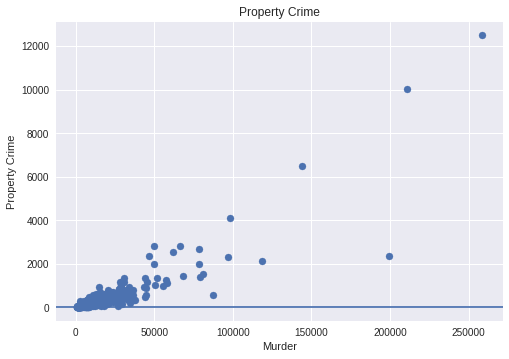

In [21]:
plt.scatter(crime.population, crime.propertyCrime)
plt.xlabel('Murder')
plt.ylabel('Property Crime')
plt.axhline(y=0)
plt.title('Property Crime')
plt.show()

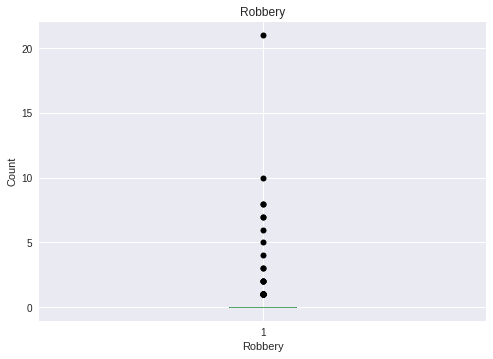

In [22]:
crime.robbery.fillna(value=crime.robbery.median(), inplace=True)
plt.boxplot(crime.robbery, sym='k')
plt.title('Robbery')
plt.xlabel('Robbery')
plt.ylabel('Count')
plt.show()

In [34]:
crime.robbery.describe()

count    351.000000
mean       0.344729
std        1.574155
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       21.000000
Name: robbery, dtype: float64

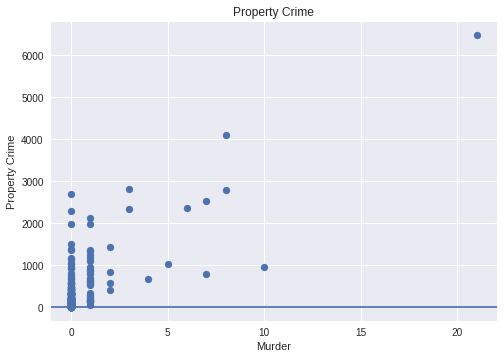

In [23]:
plt.scatter(crime.murder, crime.propertyCrime)
plt.xlabel('Murder')
plt.ylabel('Property Crime')
plt.axhline(y=0)
plt.title('Property Crime')
plt.show()

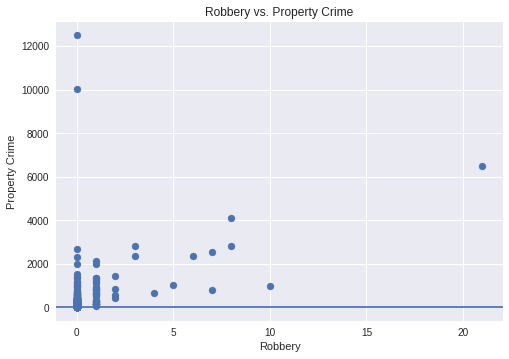

In [24]:
plt.scatter(crime.robbery, crime.propertyCrime)
plt.xlabel('Robbery')
plt.ylabel('Property Crime')
plt.axhline(y=0)
plt.title('Robbery vs. Property Crime')
plt.show()

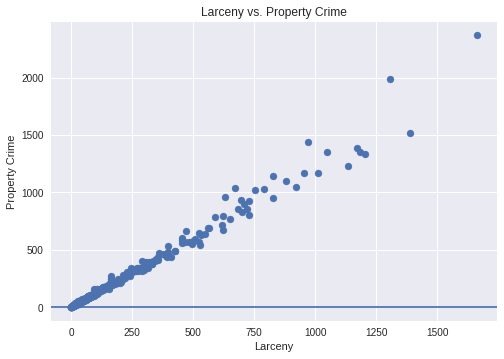

In [25]:
plt.scatter(crime.larceny, crime.propertyCrime)
plt.xlabel('Larceny')
plt.ylabel('Property Crime')
plt.axhline(y=0)
plt.title('Larceny vs. Property Crime')
plt.show()

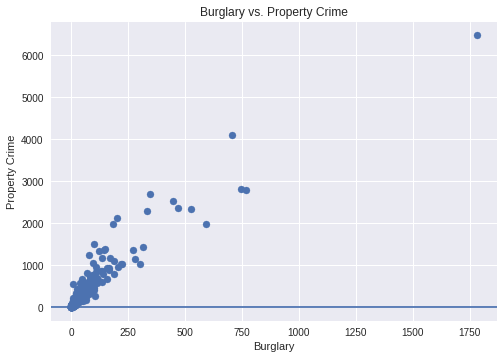

In [26]:
plt.scatter(crime.burglary, crime.propertyCrime)
plt.xlabel('Burglary')
plt.ylabel('Property Crime')
plt.axhline(y=0)
plt.title('Burglary vs. Property Crime')
plt.show()

In [38]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
Y = crime['propertyCrime'].values.reshape(-1, 1)
X = crime[['population', 'population2', 'murder','robbery','larceny', 'burglary', 'arson']]

# impute 0 to nans
X.fillna(value=0, inplace= True)

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.nan_to_num.html
np.nan_to_num(Y, copy=False)


regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.18615067e-02 -3.79379671e-09 -3.57084959e+01 -3.57084959e+01
  -6.11938273e-01  1.19542380e+00  2.48175721e+01]]

Intercept: 
 [-67.77298099]

R-squared:
0.8440765591569814


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for

In [0]:
Y = crime['propertyCrime'].values.reshape(-1, 1)
X = crime[['murder','robbery','larceny', 'burglary', 'arson']]

In [29]:
Y.shape

(351, 1)

In [30]:
type(X)

pandas.core.frame.DataFrame

In [31]:
type(Y)

numpy.ndarray

In [32]:
X.shape

(351, 5)

In [33]:
X.dtypes

murder      float64
robbery     float64
larceny     float64
burglary    float64
arson       float64
dtype: object

In [0]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

linear_formula = 'propertyCrime ~ population+population2+murder+robbery+larceny+burglary+arson'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime).fit()

In [42]:
lm.params

Intercept     -5.664224e-01
population     9.939929e-05
population2    3.170214e-09
murder         3.221233e+00
robbery        3.221233e+00
larceny        9.989170e-01
burglary       1.112832e+00
arson          2.051102e-01
dtype: float64

In [43]:
lm.pvalues

Intercept       3.236795e-01
population      1.959091e-01
population2     3.364639e-19
murder          3.827149e-25
robbery         3.827149e-25
larceny        1.313499e-214
burglary       6.378756e-140
arson           5.185159e-01
dtype: float64

In [44]:
lm.rsquared

0.9997568933618834

In [49]:
X2 = crime[['population','population2', 'murder','robbery','larceny', 'burglary']]

# impute 0 to nans
X2.fillna(value=0, inplace= True)

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.nan_to_num.html
np.nan_to_num(Y, copy=False)

regr.fit(X2,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2, Y))


Coefficients: 
 [[ 3.59734246e-02 -4.28336829e-09 -3.25181058e+01 -3.25181058e+01
  -7.95055904e-01  1.27166000e+00]]

Intercept: 
 [-79.41603776]

R-squared:
0.8194728056047093


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
